# Wordlwide Box office Data Analysis using Seaborn and Matplotlib 


Data is Collected from :
    https://www.themoviedb.org/
    
1.This Dataset consists of 203 features.

2.Extensive Collection of features are available.

3.Revenue is the target columns.

4.In this Project Extensive Exploratory Data Analysis is done inorder to analyse the revenue of films.
        

In [203]:
#Importint Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud,STOPWORDS

In [204]:
cd data

[WinError 2] The system cannot find the file specified: 'data'
C:\Users\Appaswamy\Desktop\TMDB_Box_Office\Part1\data


In [205]:
#reading the data
df=pd.read_csv('train.csv')

In [206]:
#Printing Head of the Dataframe
df.head(2)

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,...,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,...,12,4,2,13,8,4,2,4,4,0
1,2,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,8/6/04,...,0,0,1,0,1,1,1,0,0,0


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Columns: 203 entries, id to departments_Actors
dtypes: float64(2), int64(188), object(13)
memory usage: 4.6+ MB


In [208]:
#Huge Number of Columns
df.columns

Index(['id', 'budget', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date',
       ...
       'departments_Art', 'departments_Crew', 'departments_Writing',
       'departments_Costume & Make-Up', 'departments_Camera',
       'departments_Directing', 'departments_Editing',
       'departments_Visual Effects', 'departments_Lighting',
       'departments_Actors'],
      dtype='object', length=203)

In [209]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3000.0,1.500500e+03,8.661697e+02,1.000000,7.507500e+02,1.500500e+03,2.250250e+03,3.000000e+03
budget,3000.0,2.253133e+07,3.702609e+07,0.000000,0.000000e+00,8.000000e+06,2.900000e+07,3.800000e+08
popularity,3000.0,8.463274e+00,1.210400e+01,0.000001,4.018053e+00,7.374861e+00,1.089098e+01,2.943370e+02
runtime,2998.0,1.078566e+02,2.208643e+01,0.000000,9.400000e+01,1.040000e+02,1.180000e+02,3.380000e+02
revenue,3000.0,6.672585e+07,1.375323e+08,1.000000,2.379808e+06,1.680707e+07,6.891920e+07,1.519558e+09
...,...,...,...,...,...,...,...,...
departments_Directing,3000.0,1.651333e+00,1.353653e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+01
departments_Editing,3000.0,1.502667e+00,1.726940e+00,0.000000,0.000000e+00,1.000000e+00,2.000000e+00,1.400000e+01
departments_Visual Effects,3000.0,1.197000e+00,3.733475e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.200000e+01
departments_Lighting,3000.0,4.343333e-01,1.235393e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01


In [210]:
#Checking null values
df.isnull().sum()

id                               0
budget                           0
homepage                      2054
imdb_id                          0
original_language                0
                              ... 
departments_Directing            0
departments_Editing              0
departments_Visual Effects       0
departments_Lighting             0
departments_Actors               0
Length: 203, dtype: int64

In [211]:
df['homepage'].head()

0                                  NaN
1                                  NaN
2    http://sonyclassics.com/whiplash/
3           http://kahaanithefilm.com/
4                                  NaN
Name: homepage, dtype: object

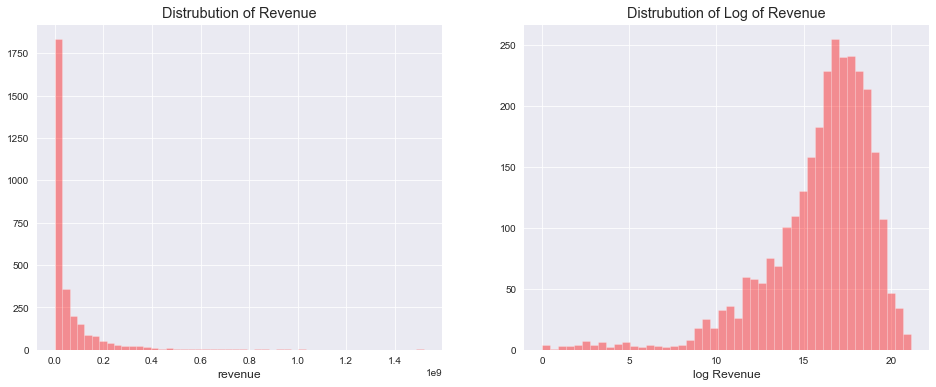

In [212]:
#Checking distrubution of revenue Column
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(df['revenue'],kde=False,color='red')
plt.title('Distrubution of Revenue')
plt.subplot(1,2,2)
sns.distplot(np.log(df['revenue']),kde=False,color='red')
plt.xlabel('log Revenue')
plt.title('Distrubution of Log of Revenue');

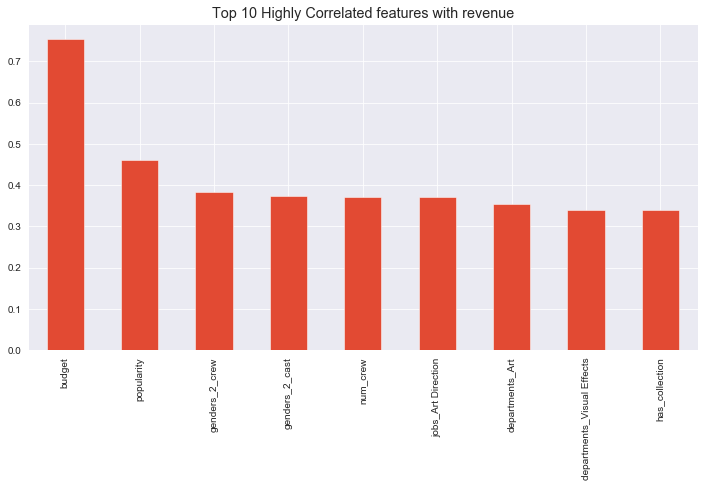

In [213]:
plt.figure(figsize=(12,6))
df.corr()['revenue'].sort_values(ascending=False)[1:10].plot(kind='bar')
plt.title("Top 10 Highly Correlated features with revenue");

In [214]:
df['budget'].isnull().sum()

0

Text(0.5, 1.0, 'Distrubution of Log of Budget')

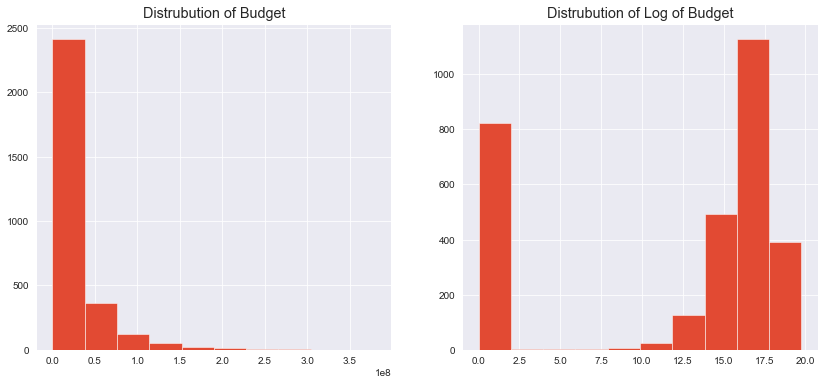

In [215]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.hist(df['budget'])
plt.title('Distrubution of Budget')
plt.subplot(1,2,2)
plt.hist(np.log1p(df['budget']))
plt.title('Distrubution of Log of Budget')

Text(0.5, 1.0, 'Budget vs Revenue')

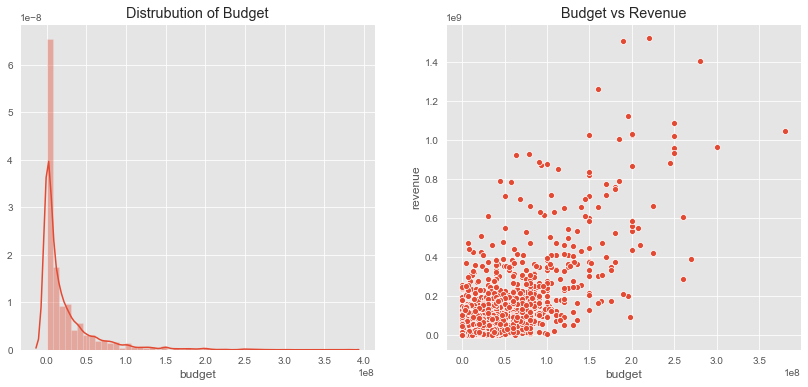

In [216]:
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(df['budget'])
plt.title("Distrubution of Budget")
plt.subplot(1,2,2)
sns.scatterplot(x='budget',y='revenue',data=df)
plt.title("Budget vs Revenue")

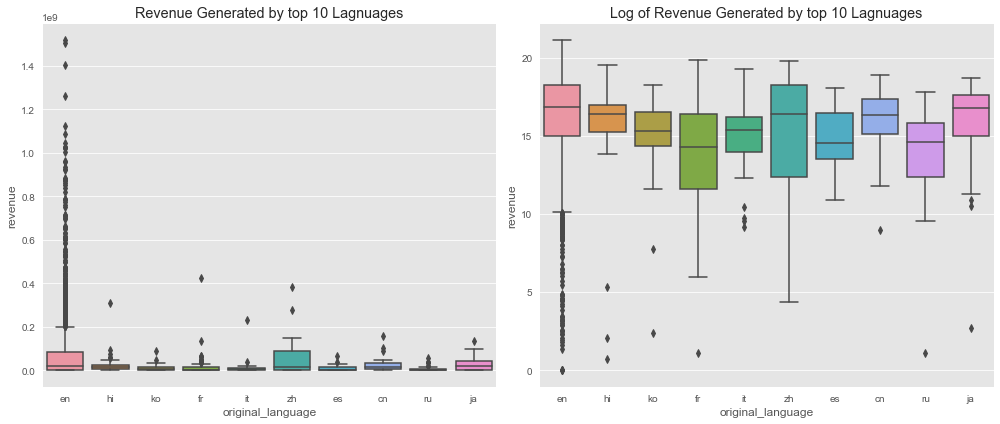

In [217]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(x='original_language',y='revenue',data=df.loc[df['original_language'].isin(df['original_language'].value_counts().head(10).index)])
plt.title("Revenue Generated by top 10 Lagnuages")
plt.subplot(1,2,2)
sns.boxplot(x='original_language',y=np.log(df['revenue']),data=df.loc[df['original_language'].isin(df['original_language'].value_counts().head(10).index)])
plt.title("Log of Revenue Generated by top 10 Lagnuages")
plt.tight_layout()

In [218]:
len(df[df['original_language']=='en'])

2575

In [219]:
df.shape

(3000, 203)

# Does having Home Page Accounts for Revenue..? Let's Check it

In [220]:
df['homepage'].value_counts()

http://www.transformersmovie.com/             4
http://www.lordoftherings.net/                2
http://www.thehobbit.com/                     2
http://www.maxpaynethemovie.com               1
http://greatbuckhowardmovie.com/              1
                                             ..
http://mazerunnermovies.com                   1
http://movies.warnerbros.com/pk3/             1
http://www.splitmovie.com/                    1
http://www.yoursisterssister-themovie.com/    1
http://www.henamedmemalalamovie.com/          1
Name: homepage, Length: 941, dtype: int64

In [221]:
df['homepage'].isnull().sum()

2054

In [222]:
#creating new feature based on homepage
df['has_homepage']=df['homepage'].apply(lambda x:0 if(pd.isnull(x)) else 1)

In [223]:
len(df[df['has_homepage']==0])

2054

In [224]:
df.shape

(3000, 204)

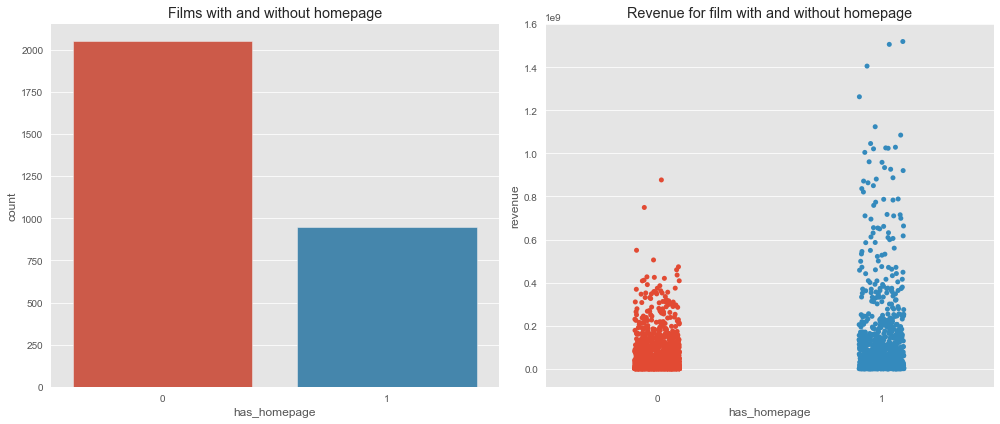

In [225]:
plt.figure(figsize=(14,6));
plt.subplot(1,2,1)
sns.countplot(df['has_homepage'])
plt.title('Films with and without homepage');
plt.subplot(1,2,2)
sns.stripplot(x='has_homepage',y='revenue',data=df);
plt.title('Revenue for film with and without homepage');
plt.tight_layout()


Well Films With Home page Produced more revenue than the other

In [226]:
text="".join(df['original_title'].values)

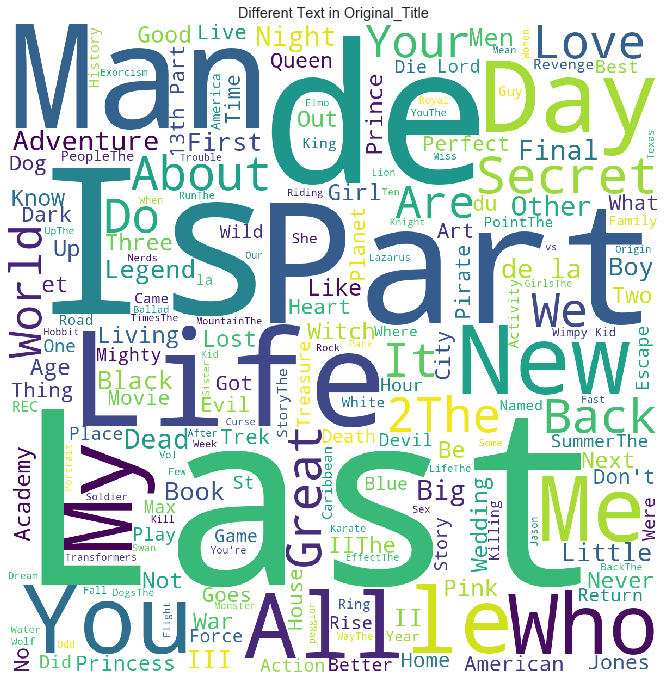

In [227]:
plt.figure(figsize=(15,12))
wrdcloud=WordCloud(background_color='white',height=1200,width=1200).generate(text);
plt.imshow(wrdcloud)
plt.title('Different Text in Original_Title')
plt.axis('off')
plt.show()

Top Words in Original Title

In [228]:
df['overview'].isnull().sum()

8

In [229]:
text1="".join(df['overview'].fillna(" ").values)

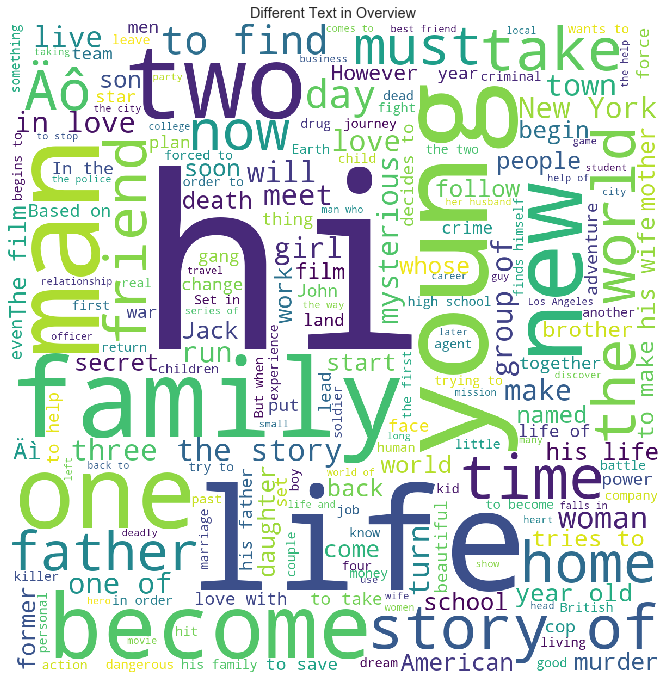

In [230]:
plt.figure(figsize=(15,12))
wrdcloud=WordCloud(background_color='white',height=1200,width=1200).generate(text1);
plt.imshow(wrdcloud)
plt.title('Different Text in Overview')
plt.axis('off')
plt.show()

Top words in Overview Column

In [231]:
df.columns[60:80]

Index(['production_company_Fox 2000 Pictures',
       'production_company_Summit Entertainment',
       'production_company_Hollywood Pictures',
       'production_company_Orion Pictures',
       'production_company_Amblin Entertainment',
       'production_company_Dimension Films', 'num_countries',
       'production_country_United States of America',
       'production_country_United Kingdom', 'production_country_France',
       'production_country_Germany', 'production_country_Canada',
       'production_country_India', 'production_country_Italy',
       'production_country_Japan', 'production_country_Australia',
       'production_country_Russia', 'production_country_Spain',
       'production_country_China', 'production_country_Hong Kong'],
      dtype='object')

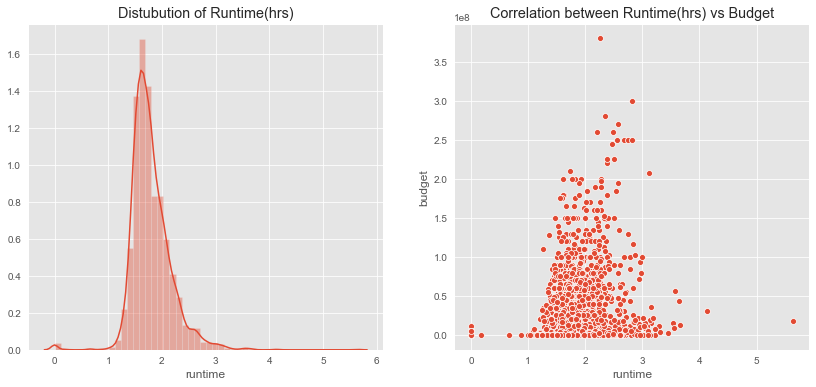

In [232]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(df['runtime']/60)
plt.title("Distubution of Runtime(hrs)");
plt.subplot(1,2,2)
sns.scatterplot(df['runtime']/60,df['budget'])
plt.title("Correlation between Runtime(hrs) vs Budget");

In [233]:
#Top 10 Highly Correlated features with revenue column
df.corr()['revenue'].sort_values(ascending=False)[1:20]

budget                           0.752965
popularity                       0.461460
genders_2_crew                   0.382858
genders_2_cast                   0.372587
num_crew                         0.372110
jobs_Art Direction               0.371584
departments_Art                  0.354454
departments_Visual Effects       0.340445
has_collection                   0.339425
num_cast                         0.335737
genders_0_crew                   0.329154
genre_Adventure                  0.328439
departments_Editing              0.304869
departments_Costume & Make-Up    0.302472
departments_Sound                0.293343
departments_Camera               0.292202
departments_Production           0.282189
departments_Crew                 0.267049
genders_1_crew                   0.266856
Name: revenue, dtype: float64

Text(0.5, 1.0, 'Correlation between Budget and Revenue')

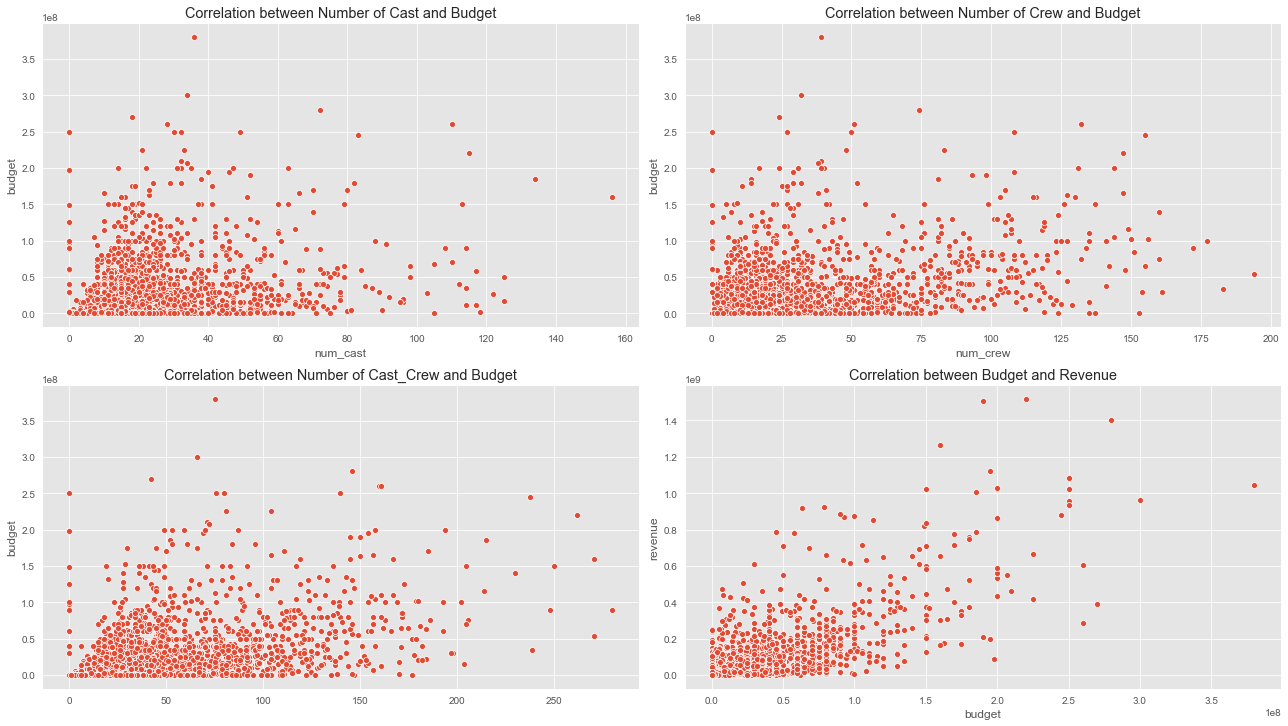

In [234]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.scatterplot(df['num_cast'],df['budget'])
plt.title("Correlation between Number of Cast and Budget")
plt.subplot(2,2,2)
sns.scatterplot(df['num_crew'],df['budget'])
plt.title("Correlation between Number of Crew and Budget")
plt.subplot(2,2,3)
sns.scatterplot(df['num_crew']+df['num_cast'],df['budget'])
plt.title("Correlation between Number of Cast_Crew and Budget")
plt.tight_layout()
plt.subplot(2,2,4)
sns.scatterplot(df['budget'],df['revenue'])
plt.title("Correlation between Budget and Revenue")

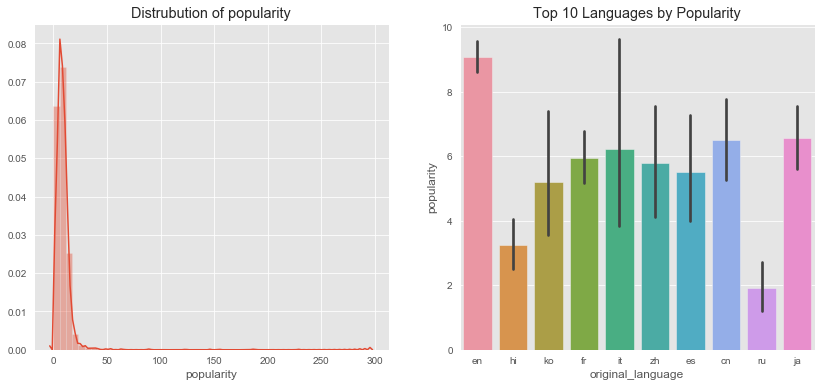

In [235]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(df['popularity'])
plt.title("Distrubution of popularity")
plt.subplot(1,2,2)
sns.barplot(x='original_language',y='popularity',data=df.loc[df['original_language'].isin(df['original_language'].value_counts().head(10).index)],estimator=np.mean)
plt.title("Top 10 Languages by Popularity");

In [236]:
def fix_date(x):
    year = x.split('/')[2]
    if int(year) <= 19:
        return x[:-2] + '20' + year
    else:
        return x[:-2] + '19' + year

In [237]:
df['release_date'] = df['release_date'].apply(lambda x: fix_date(x))

In [238]:
df['release_date'][0]

'2/20/2015'

In [239]:
df['release_date']=pd.to_datetime(df['release_date'])

In [240]:
getattr(df['release_date'].dt,'weekofyear')

0        8
1       32
2       41
3       10
4        6
        ..
2995    16
2996    13
2997    41
2998     3
2999    38
Name: release_date, Length: 3000, dtype: int64

In [241]:
def new_features(df):
    features=['weekday','month','year','day','quarter','weekofyear']
    for ft in features:
        x='release_date'+"_"+ft
        df[x]=getattr(df['release_date'].dt,ft).astype(int)
    return df

In [242]:
df=new_features(df)

In [243]:
df['release_date_year'].value_counts()


2013    141
2015    128
2010    126
2016    125
2012    125
       ... 
1952      1
1938      1
1935      1
1921      1
1924      1
Name: release_date_year, Length: 90, dtype: int64

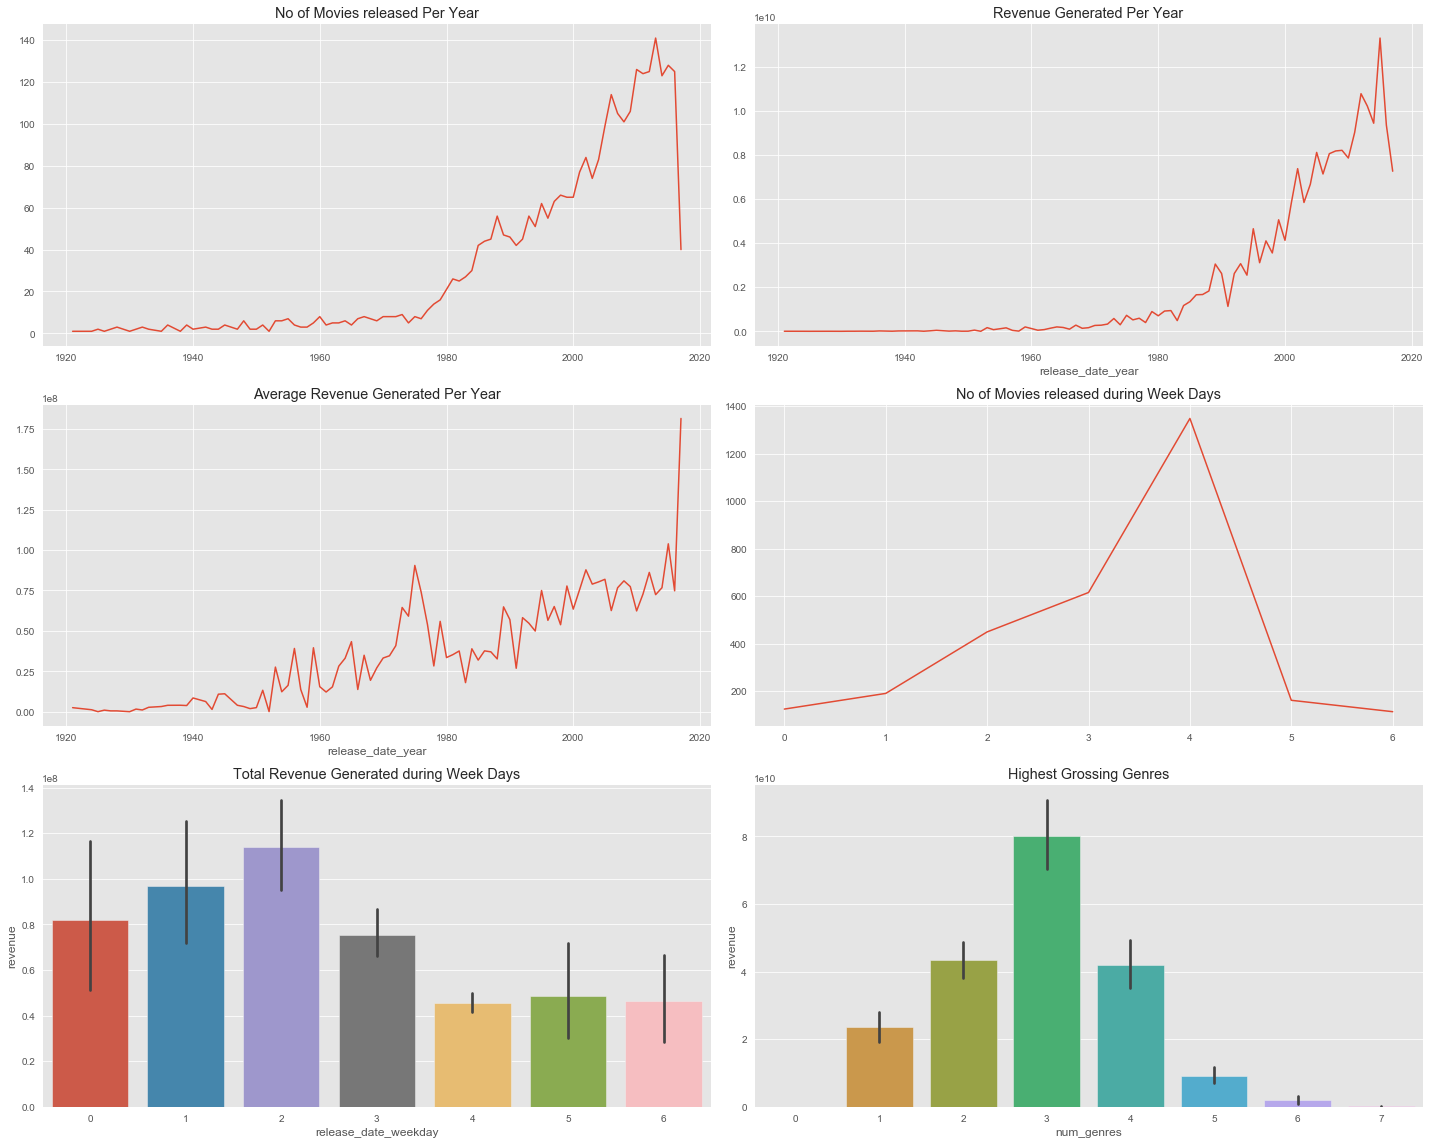

In [244]:
plt.figure(figsize=(20,16))
plt.subplot(3,2,1)
sns.lineplot(x=df['release_date_year'].value_counts().index,y=df['release_date_year'].value_counts().values)
plt.title('No of Movies released Per Year');
plt.subplot(3,2,2)
sns.lineplot(x=df.groupby('release_date_year')['revenue'].sum().index,y=df.groupby('release_date_year')['revenue'].sum().values,data=df)
plt.title('Revenue Generated Per Year')
plt.subplot(3,2,3)
sns.lineplot(x=df.groupby('release_date_year')['revenue'].mean().index,y=df.groupby('release_date_year')['revenue'].mean().values,data=df)
plt.title('Average Revenue Generated Per Year')
plt.subplot(3,2,4)
sns.lineplot(x=df['release_date_weekday'].value_counts().index,y=df['release_date_weekday'].value_counts().values,data=df)
plt.title('No of Movies released during Week Days')
plt.subplot(3,2,5)
sns.barplot(x=df['release_date_weekday'],y=df['revenue'],data=df)
plt.title('Total Revenue Generated during Week Days')
plt.subplot(3,2,6)
sns.barplot(x='num_genres', y='revenue', data=df,estimator=np.sum);
plt.title("Highest Grossing Genres")
plt.tight_layout()

In [245]:
india=df[df['production_country_India']==1]

In [246]:
india.shape

(81, 210)

In [247]:
india['original_title']

3                               Kahaani
76            Kandukondain Kandukondain
213                         राउडी राठौर
241     Legends of Oz: Dorothy's Return
276                           Arundhati
                     ...               
2859                            Singham
2860                             Gandhi
2881                    Bridge of Spies
2959                         Jab We Met
2980                    ആക്ഷൻ ഹീറോ ബിജു
Name: original_title, Length: 81, dtype: object

In [248]:
text2="".join(india['original_title'].fillna(" ").values)
len(text2)

880

In [249]:
cd Desktop\TMDB_Box_Office\Part1\completed_notebook

[WinError 3] The system cannot find the path specified: 'Desktop\\TMDB_Box_Office\\Part1\\completed_notebook'
C:\Users\Appaswamy\Desktop\TMDB_Box_Office\Part1\data


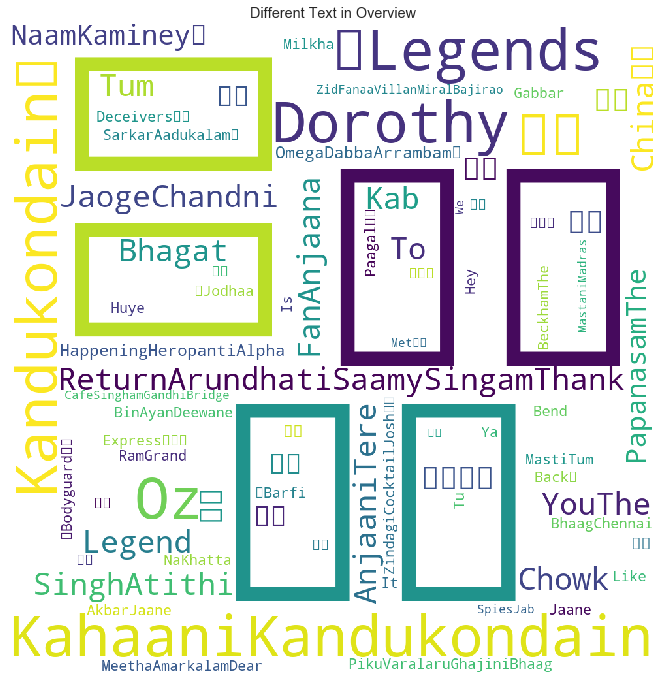

In [250]:
plt.figure(figsize=(14,12))
wrdcloud=WordCloud(background_color='white',height=1000,width=1000,max_words=880,stopwords=set(STOPWORDS)).generate(text2);
plt.imshow(wrdcloud)
plt.title('Different Text in Overview')
plt.axis('off')
plt.show()

In [251]:
india.head(2)

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,...,departments_Visual Effects,departments_Lighting,departments_Actors,has_homepage,release_date_weekday,release_date_month,release_date_year,release_date_day,release_date_quarter,release_date_weekofyear
3,4,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,2012-03-09,...,0,0,0,1,4,3,2012,9,1,10
76,77,500000,NaN,tt0242572,ta,Kandukondain Kandukondain,Two young women with differing views on love f...,0.660663,/AnhaX3iivU7aLc6fLuAuHXTsbgO.jpg,2000-05-05,...,0,0,0,0,4,5,2000,5,2,18


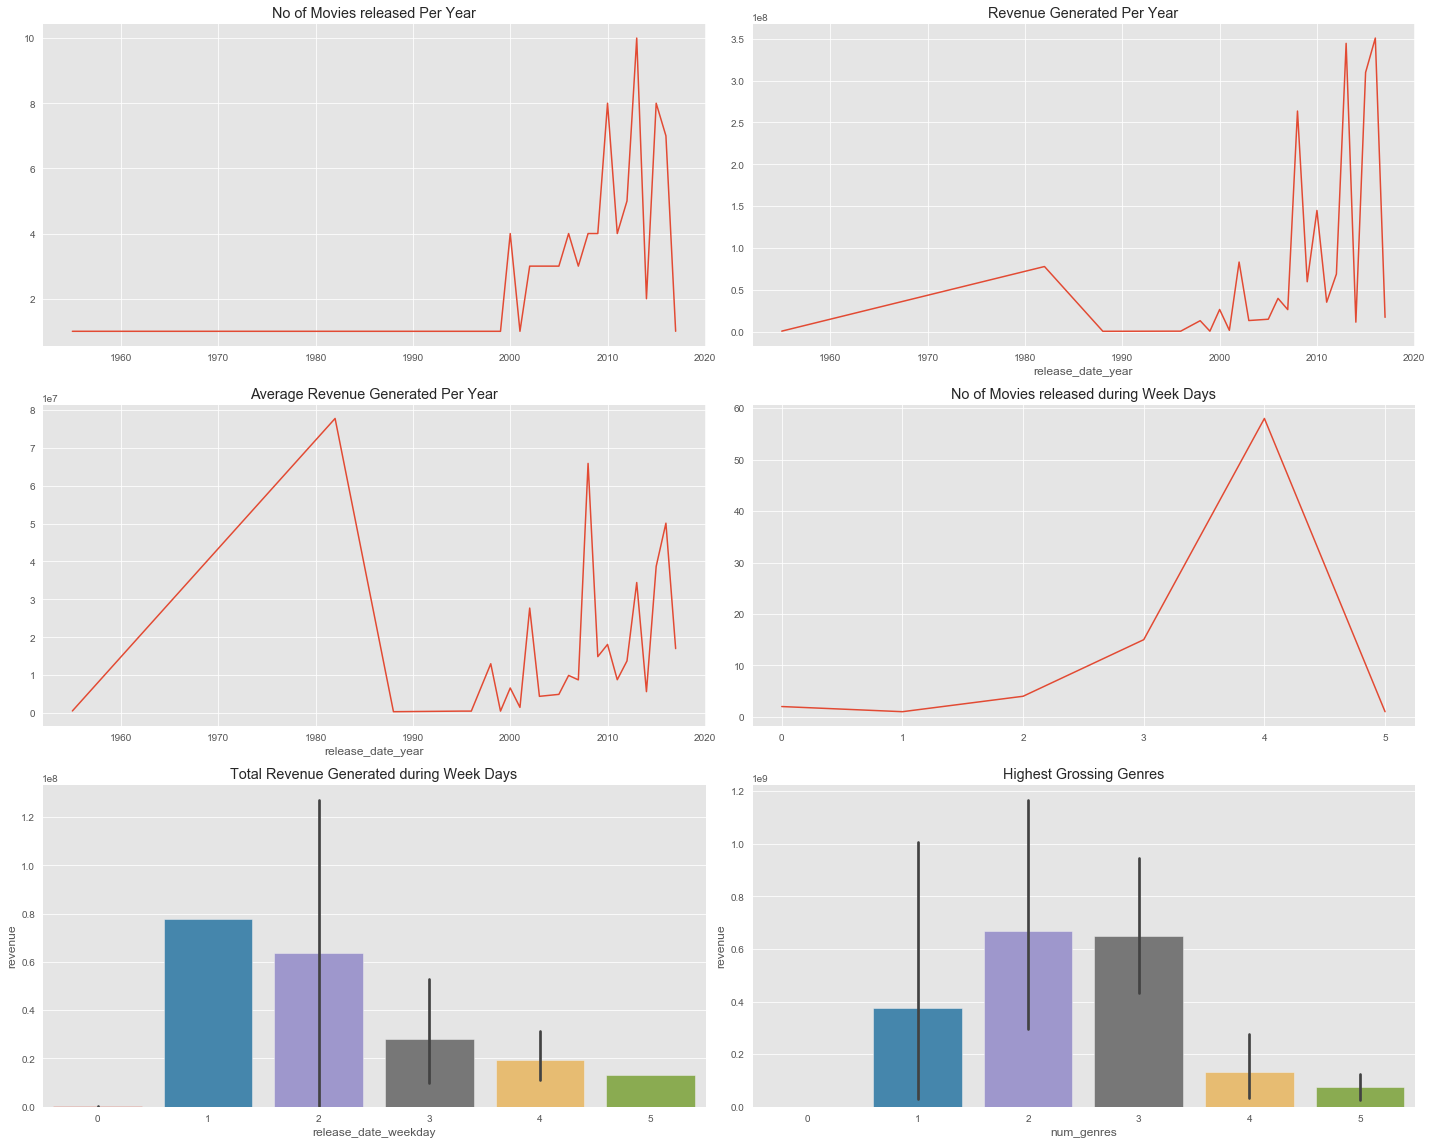

In [252]:
plt.figure(figsize=(20,16))
plt.subplot(3,2,1)
sns.lineplot(x=india['release_date_year'].value_counts().index,y=india['release_date_year'].value_counts().values)
plt.title('No of Movies released Per Year');
plt.subplot(3,2,2)
sns.lineplot(x=india.groupby('release_date_year')['revenue'].sum().index,y=india.groupby('release_date_year')['revenue'].sum().values,data=india)
plt.title('Revenue Generated Per Year')
plt.subplot(3,2,3)
sns.lineplot(x=india.groupby('release_date_year')['revenue'].mean().index,y=india.groupby('release_date_year')['revenue'].mean().values,data=india)
plt.title('Average Revenue Generated Per Year')
plt.subplot(3,2,4)
sns.lineplot(x=india['release_date_weekday'].value_counts().index,y=india['release_date_weekday'].value_counts().values,data=india)
plt.title('No of Movies released during Week Days')
plt.subplot(3,2,5)
sns.barplot(x=india['release_date_weekday'],y=india['revenue'],data=india)
plt.title('Total Revenue Generated during Week Days')
plt.subplot(3,2,6)
sns.barplot(x='num_genres', y='revenue', data=india,estimator=np.sum);
plt.title("Highest Grossing Genres")
plt.tight_layout()

OOPS these values are accodrding to this dataset: